# Notebook to analyse Surface responce curves and expected changes of fire danger in Europe

In [1]:
import xarray as xr
import math 
import cartopy as cart
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as colors
import pandas as pd
import datetime as dt
import numpy as np
plt.rcParams.update({'font.size': 15})

import matplotlib.mlab as mlab
from matplotlib.patches import Ellipse
import matplotlib.ticker as mtick
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap

In [2]:
from matplotlib import font_manager
#font_manager.findSystemFonts(fontpaths=None, fontext="ttf")

<div class="alert alert-block alert-success">
<b>Figure 4 and 5  </b>: <br>
  Europe maps and bar plots  .</div>
<br>

In [3]:
#calour managmnet resources

def hex_to_rgb(value):
    '''
    Converts hex to rgb colours
    value: string of 6 characters representing a hex colour.
    Returns: list length 3 of RGB values'''
    value = value.strip("#") # removes hash symbol if present
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_dec(value):
    '''
    Converts rgb to decimal colours (i.e. divides each value by 256)
    value: list (length 3) of RGB values
    Returns: list (length 3) of decimal values'''
    return [v/256 for v in value]


def get_continuous_cmap(hex_list, float_list=None):
    ''' creates and returns a color map that can be used in heat map figures.
        If float_list is not provided, colour map graduates linearly between each color in hex_list.
        If float_list is provided, each color in hex_list is mapped to the respective location in float_list. 
        
        Parameters
        ----------
        hex_list: list of hex code strings
        float_list: list of floats between 0 and 1, same length as hex_list. Must start with 0 and end with 1.
        
        Returns
        ----------
        colour map'''
    rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
    if float_list:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
        
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp =LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp
hex_list =['#8c8a89','#f5efc6','#619130','#fcba03','#d4170d','#8b3091']
hex_list =['#f5efc6','#619130','#fcba03','#d4170d','#8b3091']
my_col=get_continuous_cmap(hex_list)



In [4]:
dir='/perm/nen/surface_responce_hotspot/'

In [5]:
# Cluster files 
cluster=xr.open_mfdataset(dir+'clustering_kmeans_fireSeason_5c.nc')

In [6]:
cluster = cluster.sel(time=('1981-01-01'),drop=True)
dfclu=cluster.to_dataframe().reset_index()

clusters=[0,1,2,3,4,5]
dfclu_by_group=dfclu.groupby(pd.cut(dfclu["fwinx"],clusters))
dfclu_by_group

In [7]:
my_cmap = (colors.ListedColormap(hex_list))

norm = colors.BoundaryNorm(clusters, my_cmap.N)
    

In [8]:
# Mid term projection
file1_st='EUpoints_pbExceedance_20yrp_meanClimateProjections.nc'
file1_lt='EUpoints_pbExceedance_20yrp_mean_long_termClimateProjections.nc'
file2_st='EUpoints_nbDays_half20yrp_mean_mid_term_ClimateProjections_new.nc'
file2_lt='EUpoints_nbDays_half20yrp_mean_long_term_ClimateProjections_new.nc'
# choose a file 
file=file2_st
spot = xr.open_mfdataset(dir+file)


In [9]:
spot = spot.sel(time=('1981-01-01'),drop=True)
df=spot.to_dataframe().reset_index()
#df[df['fwinx']>80] =5


In [10]:
#steps=[5,10,15,20,25,50] #for prob of exceedence
steps=[0,4,8,12,16,22] # for days in a season 
#plot_title='Probability of a 20year return period event \n'#for prob of exceedence
plot_title='Increased fire length (days) \n'#for days in a season  
df1=df.groupby(pd.cut(df["fwinx"], steps))
groups = dict(list(df1))
groups.keys()

dict_keys([Interval(0, 4, closed='right'), Interval(4, 8, closed='right'), Interval(8, 12, closed='right'), Interval(12, 16, closed='right'), Interval(16, 22, closed='right')])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript bac

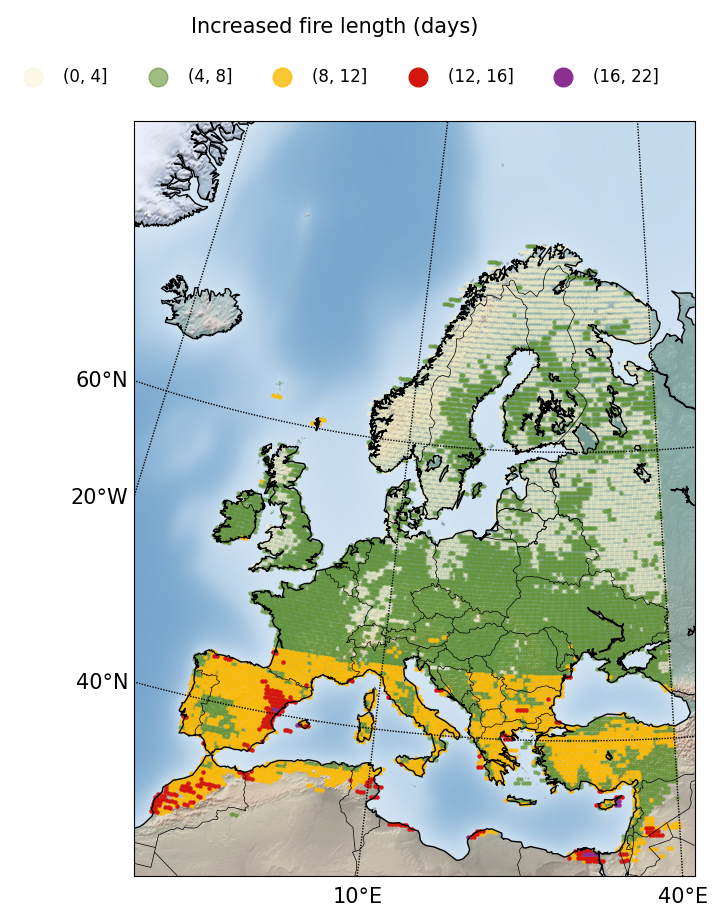

In [11]:
# create the figure and axes instances.
fig = plt.figure(figsize=(10, 10), dpi=100)
ax = fig.add_subplot(111)
#ax = fig.add_axes([0.1,0.1,0.8,0.8])
# setup of basemap ('lcc' = lambert conformal conic).
# use major and minor sphere radii from WGS84 ellipsoid.
#m = Basemap(llcrnrlon=-15,llcrnrlat=30.,urcrnrlon=40,urcrnrlat=70,\
#            rsphere=(6378137.00,6356752.3142),\
#            resolution='l',area_thresh=1000.,projection='lcc',\
#            lat_1=20.,lon_0=30.,ax=ax)
m = Basemap(llcrnrlon=-10,llcrnrlat=25.,urcrnrlon=49,urcrnrlat=76,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',area_thresh=1000.,projection='lcc',\
            lat_1=20.,lon_0=30.,ax=ax)

# transform to nx x ny regularly spaced 5km native projection grid
#nx = int((m.xmax-m.xmin)/5000.)+1; ny = int((m.ymax-m.ymin)/5000.)+1

# draw coastlines and political boundaries.
m.drawcoastlines()
m.drawcountries()
m.drawstates()
# draw parallels and meridians.
# label on left and bottom of map.
parallels = np.arange(0.,80,20.)
m.drawparallels(parallels,labels=[1,0,0,1])
meridians = np.arange(10.,360.,30.)
m.drawmeridians(meridians,labels=[1,0,0,1])
#m.bluemarble()
m.shadedrelief()
# add colorbar
#cb = m.colorbar(im,"right", size="5%", pad='2%')

my_cmap = colors.ListedColormap(hex_list)

# Specify the number of discrete levels to use in the colormap

alpha=[0.4,0.6,0.8,1,1,1]

seq=0

for group_name, df_group in df1:
   # print(group_name)
   # print(df_group)
    # This is very important ! you need to calulate the p
    x, y = m(df_group['lon'], df_group['lat'])
    ax=m.scatter(
    x=x, 
    y=y, 
    s=5, 
    alpha=alpha[seq],
    c=hex_list[seq],
    norm=norm,
    label=group_name     )
    seq=seq+1
#ax here is an artist not an axis we need to import it as an axis

ax = plt.gca()    
# Fill two polygon shapes
patches = []

#for key in my_regions:
#    print(key)
#    lon1=my_regions[key][0]
#    lon2=my_regions[key][1]
#    lat1=my_regions[key][2]
#    lat2=my_regions[key][3]
#    lower_left=m(lon1,lat1)
#    lower_right=m(lon2,lat1)
#    upper_left=m(lon1,lat2)
#    upper_right=m(lon2,lat2)
#    pol = np.array([lower_left,lower_right,upper_right,upper_left])
#    patches.append(Polygon(pol))

#ax.add_collection(PatchCollection(patches, facecolor='None', alpha=0.8,edgecolor='k', linewidths=2))

plt.legend(loc='upper left',prop={'size': 12} ,ncol=6,
    bbox_to_anchor=(0.1, 1.0), frameon=False,
    title_fontsize=15,markerscale=6,
    title=plot_title,
    bbox_transform=fig.transFigure)

plt.savefig('/home/nen/Python/images/'+file+'.eps',dpi=600)
plt.show()


Groupped by clusters 

In [12]:
my_cluster={'Boreal':1,
            'Temperate':4,
            'Alpine':5,
            'Semi-Arid':3,
            'Med':2
     }

In [13]:
category_names = ['5-10%', '10-15%','15-20%', '20-25%', '25-50%']
category_names = ['0-4', '4-8','8-12', '12-16', '16-22']
cluster_dict={}
spot = xr.open_mfdataset(dir+file)  
spot = spot.sel(time=('1981-01-01'),drop=True)
df=spot.to_dataframe().reset_index()

df.rename(columns = {'fwinx':'prob'}, inplace = True)
dfclu.rename(columns = {'fwinx':'cluster'}, inplace = True)
#dfroi=roi.to_dataframe().reset_index()
df['cluster']=dfclu.cluster

for key in my_cluster:
    print(key)
    idc=my_cluster[key]
    print(idc)
    roi=df.loc[df['cluster'] == idc]
    print(roi)
    roi_grouped=roi.groupby(pd.cut(roi["prob"], steps)).count()
    all_val=sum(roi_grouped.prob.values)
    print(all_val)
    cluster_dict[key]=list(roi_grouped.prob.values/all_val*100)
    
cluster_dict

Boreal
1
             lat       lon                time      prob  cluster
1396   70.960137  23.34375 1981-01-01 12:00:00  6.855494      1.0
1397   70.960137  23.62500 1981-01-01 12:00:00  6.855494      1.0
1398   70.960137  23.90625 1981-01-01 12:00:00  6.855494      1.0
1399   70.960137  24.18750 1981-01-01 12:00:00  6.855494      1.0
1400   70.960137  24.46875 1981-01-01 12:00:00  6.855494      1.0
...          ...       ...                 ...       ...      ...
21108  40.608884  39.09375 1981-01-01 12:00:00  6.368792      1.0
21109  40.608884  39.37500 1981-01-01 12:00:00  6.718796      1.0
21110  40.608884  39.65625 1981-01-01 12:00:00  6.856094      1.0
21111  40.608884  39.93750 1981-01-01 12:00:00  5.430645      1.0
21413  40.046824  22.50000 1981-01-01 12:00:00  7.025461      1.0

[5379 rows x 5 columns]
5378
Temperate
4
             lat       lon                time       prob  cluster
7017   62.248210  17.43750 1981-01-01 12:00:00   3.692158      4.0
7018   62.248210  17.71

{'Boreal': [68.38973596132392,
  29.416139828932693,
  2.1011528449237633,
  0.09297136481963555,
  0.0],
 'Temperate': [23.535762483130902,
  69.3387314439946,
  6.909581646423751,
  0.21592442645074222,
  0.0],
 'Alpine': [16.135458167330675,
  82.47011952191235,
  1.394422310756972,
  0.0,
  0.0],
 'Semi-Arid': [3.3125, 57.9375, 35.9375, 2.4375, 0.375],
 'Med': [0.052603892688058915,
  29.458179905312992,
  60.17885323513939,
  9.994739610731195,
  0.31562335612835346]}

Grupped by hot spot

In [14]:

# survey routine provided by Siham 
def survey(results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))
    print(category_colors)
    print(hex_list)

    fig, ax = plt.subplots(figsize=(11, 5),dpi=300)
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
    for i, (colname, color) in enumerate(zip(category_names, hex_list)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2
       # r, g, b, _ = color
        text_color = 'k'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            print(c)
            ax.text(x, y, str(math.ceil(c)), ha='center', va='center',
                    color=text_color, fontsize=11)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='medium')
    ax.spines['top'].set_visible(False)    

    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
  
    return fig, ax


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[[0.89888504 0.30549789 0.20676663 1.        ]
 [0.99315648 0.73233372 0.42237601 1.        ]
 [0.99707805 0.9987697  0.74502115 1.        ]
 [0.70196078 0.87297193 0.44867359 1.        ]
 [0.24805844 0.66720492 0.3502499  1.        ]]
['#f5efc6', '#619130', '#fcba03', '#d4170d', '#8b3091']
68.38973596132392
23.535762483130902
16.135458167330675
3.3125
0.052603892688058915
29.416139828932693
69.3387314439946
82.47011952191235
57.9375
29.458179905312992
2.1011528449237633
6.909581646423751
1.394422310756972
35.9375
60.17885323513939
0.09297136481963555
0.21592442645074222
0.0
2.4375
9.994739610731195
0.0
0.0
0.0
0.375
0.31562335612835346


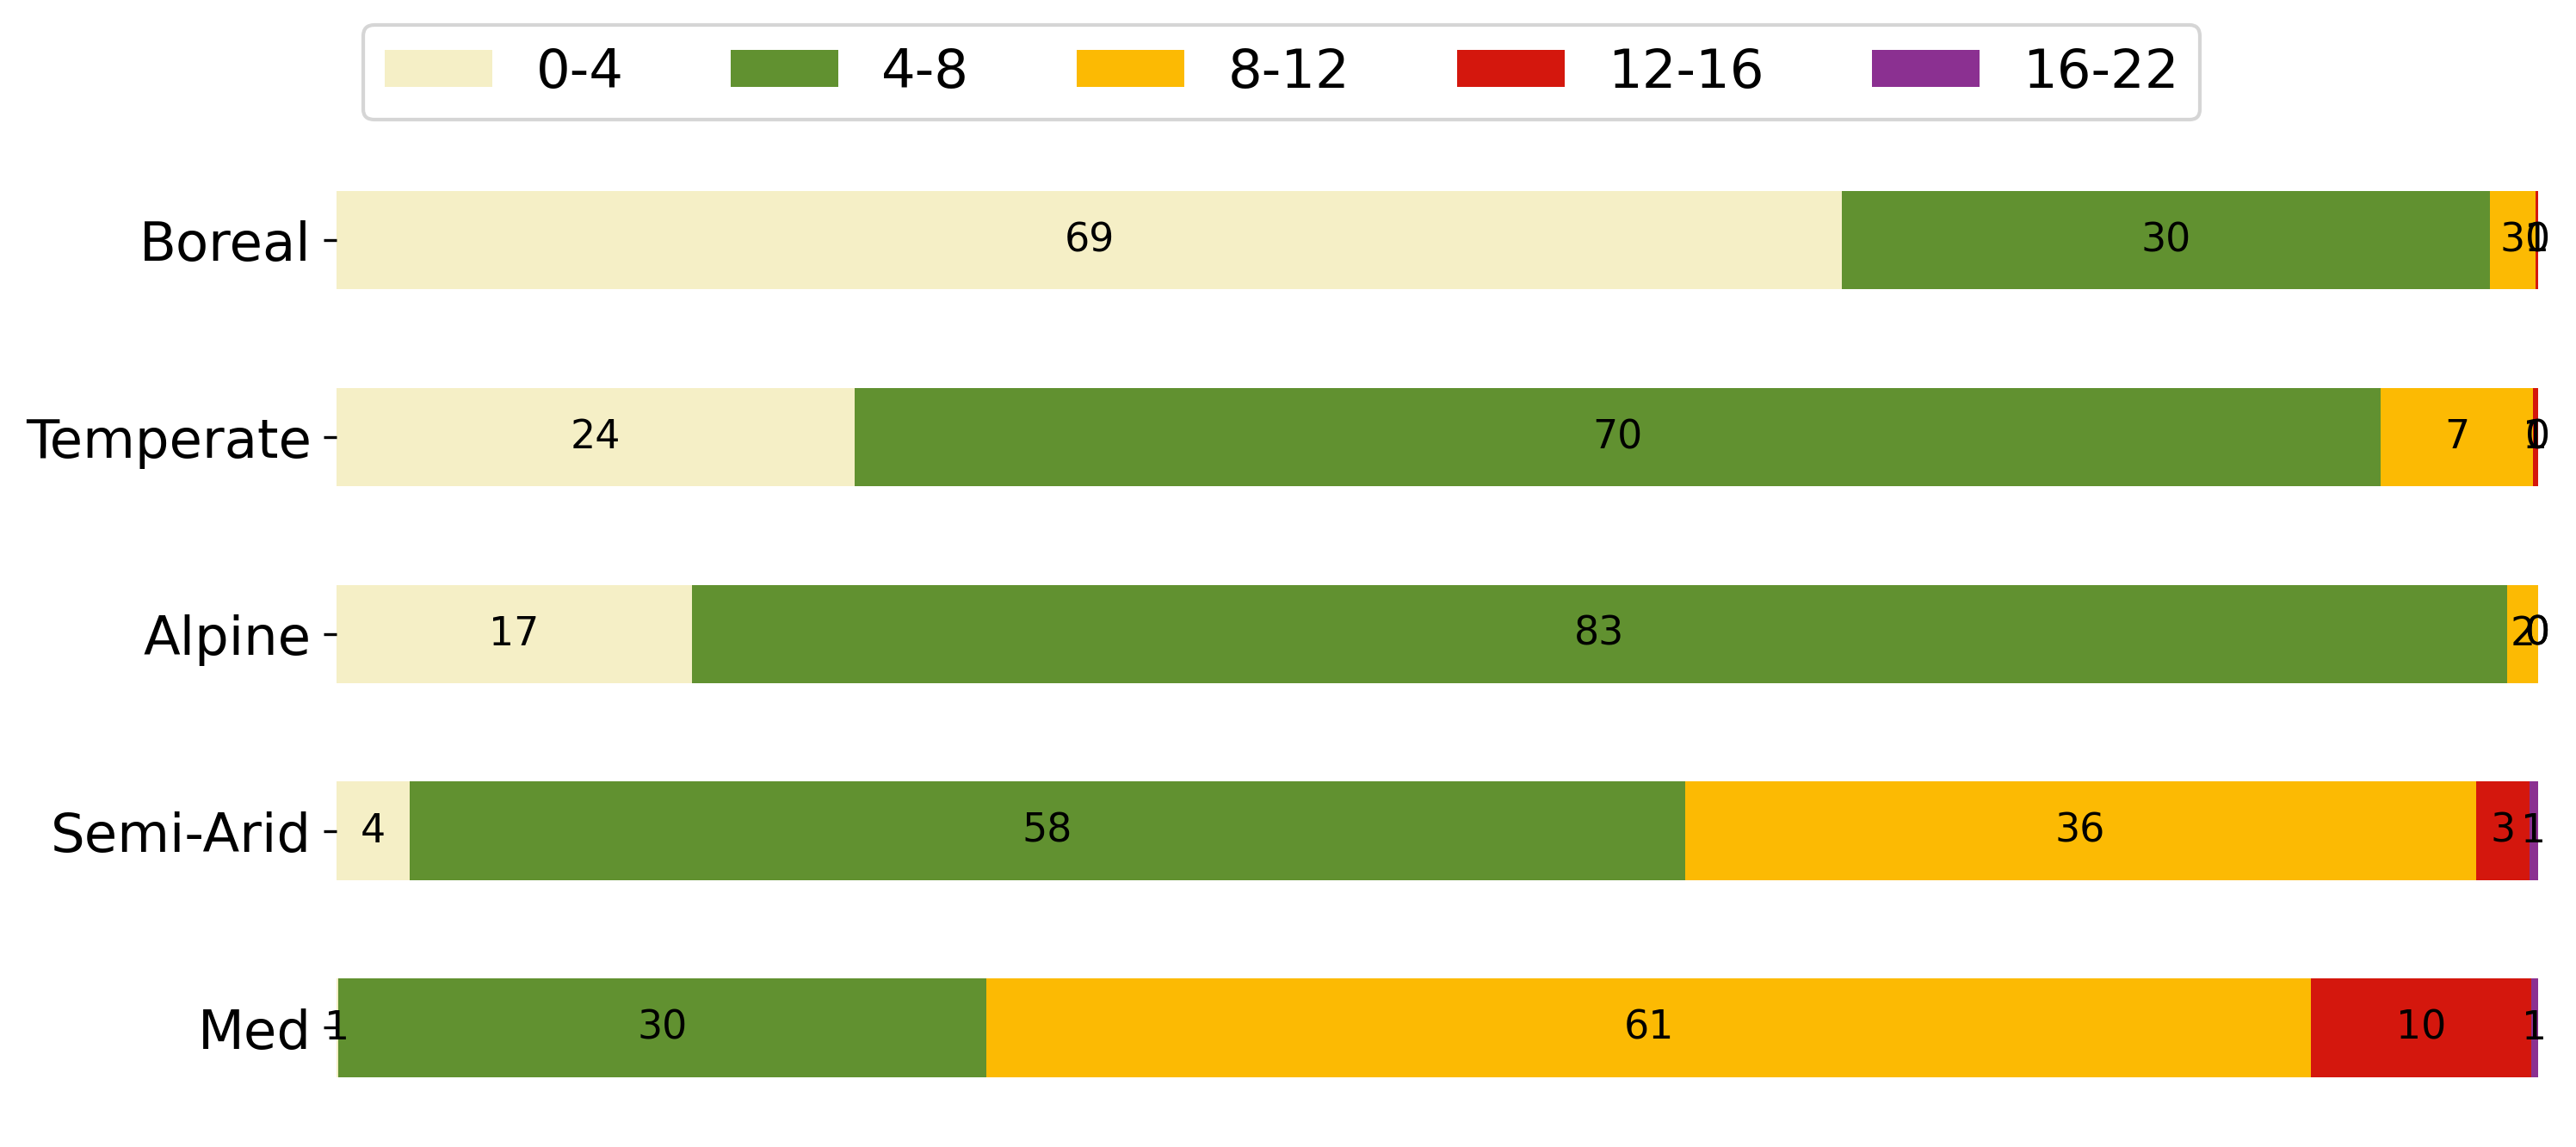

In [15]:
survey(cluster_dict,category_names)
plt.savefig('/home/nen/Python/images/'+file+'cluster_bars.eps',dpi=600)
plt.show()

Pie Charts instead 